<a href="https://colab.research.google.com/github/preethi07052004/Task_4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from wordcloud import WordCloud

Load the data

In [ ]:
df = pd.read_csv('/twitter_training[1].csv', delimiter=',')

In [ ]:
print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


Data Preprocessing

In [ ]:
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

In [ ]:
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [ ]:
def preprocess_tweet(tweet):
    if isinstance(tweet, str):  # Ensure the input is a string
        tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
        tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
        tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
        tweet = re.sub(r'\d+', '', tweet)      # Remove numbers
        tweet = tweet.lower()                  # Convert to lowercase
        tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    else:
        tweet = ''  # If not a string, return an empty string
    return tweet

In [ ]:
df['Cleaned_Tweet'] = df['Tweet'].apply(preprocess_tweet)

In [ ]:
print(df[['Tweet', 'Cleaned_Tweet', 'Sentiment']].head())

                                               Tweet  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                       Cleaned_Tweet Sentiment  
0  i am coming to the borders and i will kill you...  Positive  
1  im getting on borderlands and i will kill you all  Positive  
2  im coming on borderlands and i will murder you...  Positive  
3  im getting on borderlands  and i will murder y...  Positive  
4  im getting into borderlands and i can murder y...  Positive  


 Sentiment Analysis

In [ ]:
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
    tweets = df[df['Sentiment'] == sentiment]['Cleaned_Tweet'].values
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(tweets))

Visualization

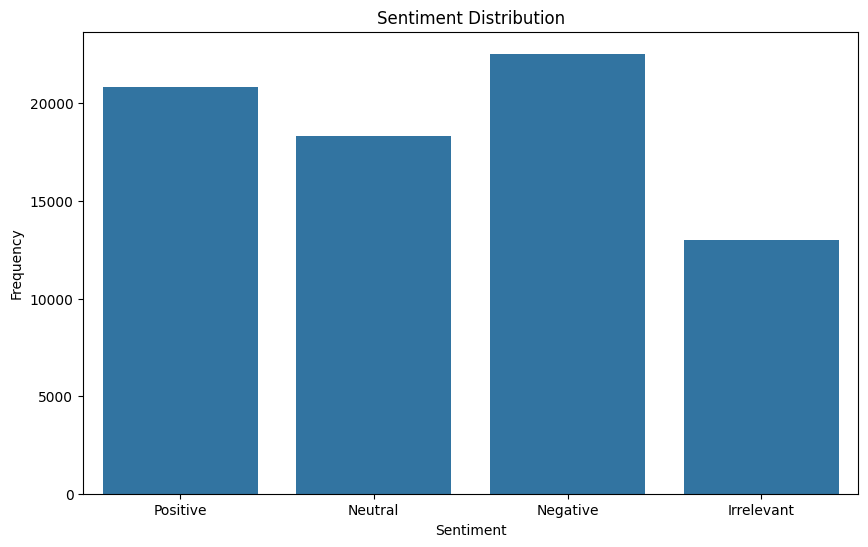

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

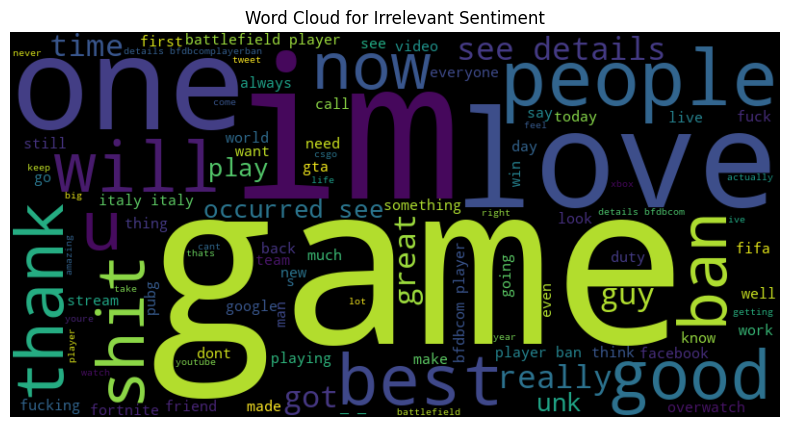

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for {sentiment} Sentiment')
plt.axis('off')
plt.show()

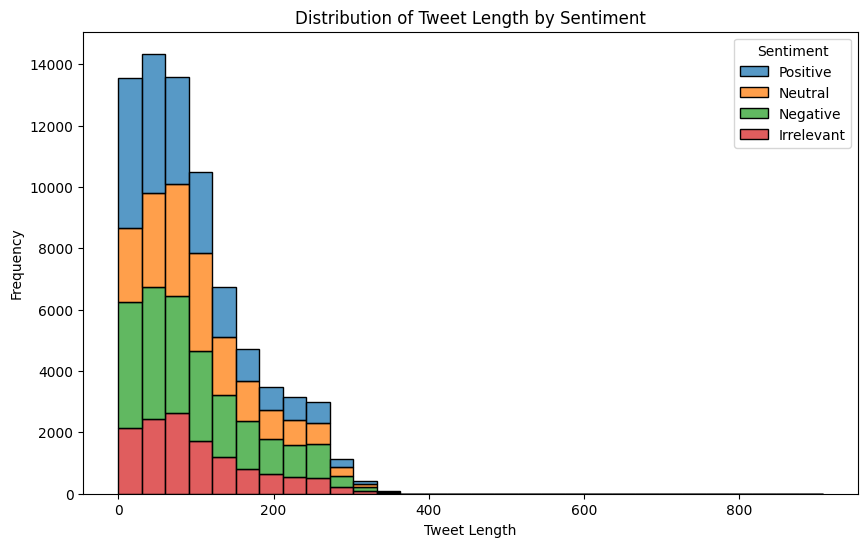

In [ ]:
df['Tweet_Length'] = df['Cleaned_Tweet'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Tweet_Length', hue='Sentiment', multiple='stack', bins=30)
plt.title('Distribution of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

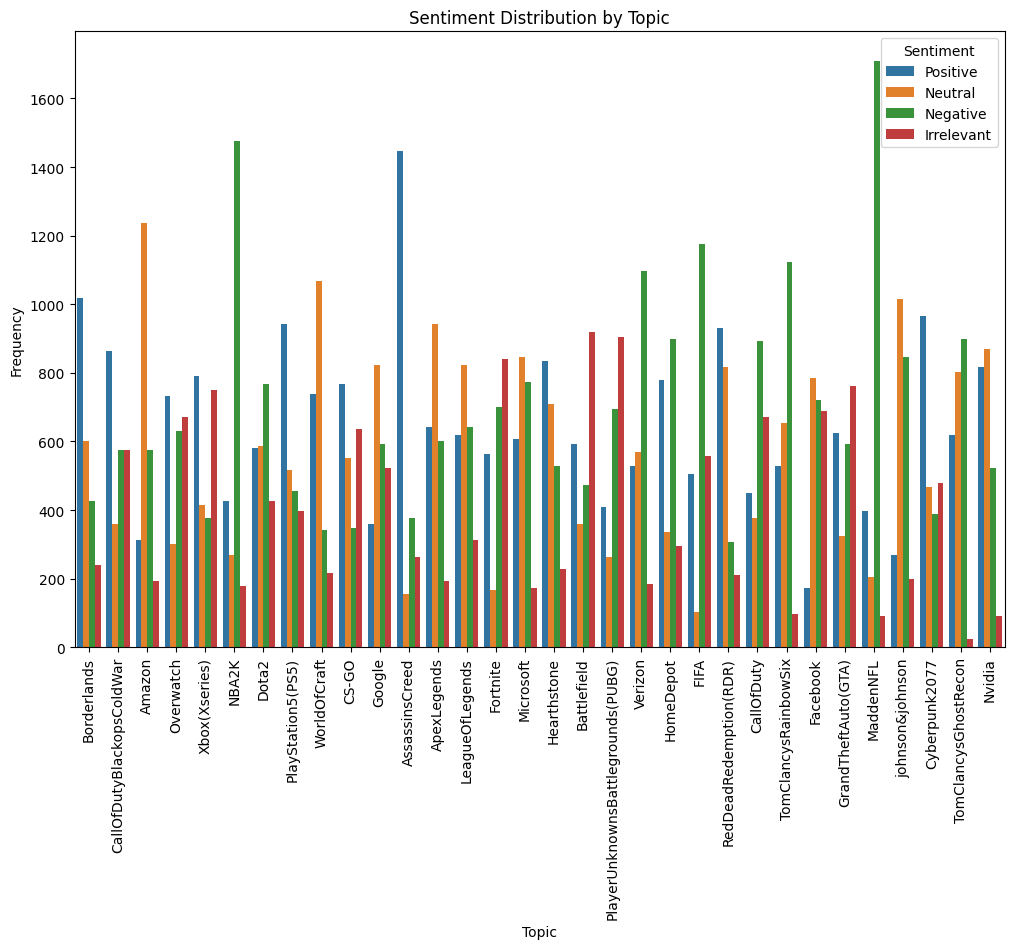

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', hue='Sentiment', data=df)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

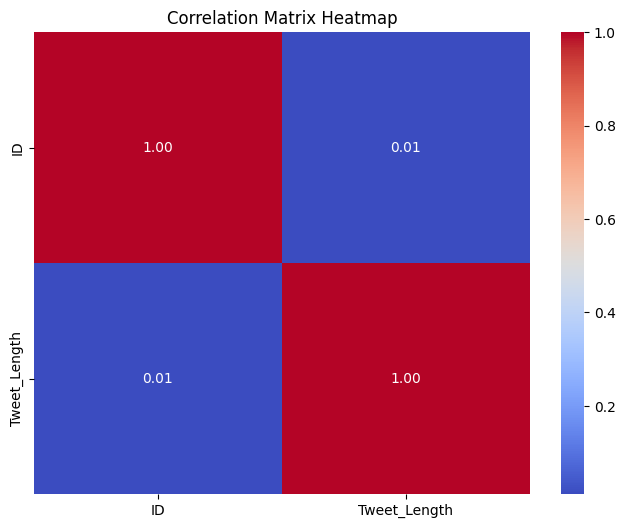

In [ ]:
corr_matrix = df[['ID', 'Tweet_Length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()